# Project 3: Advanced Running Retargeting using NLP

---
## Part 5: Modeling and Conclusions

This first section includes modeling. Prior to modeling all numerical data was scaled using StandardScaler. A null model was observed using DummyClassifier. The null model accuracy score was 62.17%. This is the probabilty of predicting the majority class. The first model performed was a Random Forest Classifier using BayesSearchCV. Random Forest parameters were hypertuned to obtain an optimal model. The second model performed was a Balanced Random Forest Classifier. This model was chosen because the original data was imbalanced and this was thought to be one of the reasons for a moderate accuracy score of the first Random Forest Model. The third model performed was a PCA and Logistic Regression using BayesSearchCV. Hyperparameters were tuned to obtain an optimal model. The final model performed was a Logistic Regression accounting for imbalanced data using BayesSearchCV. Hyperparameters were tuned to obtain an optimal model. All models performed better than the null model. Models and results are seen below. 

In [51]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.dummy import DummyClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from imblearn.ensemble import BalancedBaggingClassifier, BalancedRandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline 
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, precision_score, recall_score, balanced_accuracy_score

In [2]:
#reading in X_train, X_test, y_train and y_test
X_train=pd.read_csv('../data/X_train_vec.csv')
X_test=pd.read_csv('../data/X_test_vec.csv')
y_train=pd.read_csv('../data/y_train.csv')
y_test=pd.read_csv('../data/y_test.csv')

#### Null Model with Dummy Classifier 

In [3]:
#Null Model 
dc=DummyClassifier()
dc.fit(X_train, y_train)
dc.score(X_test, y_test) #returns percent of advanced (1)

0.6217311233885819

#### Scaling data with StandardScaler 

In [4]:
#Standard Scaler 
ss=StandardScaler()
Z_train=ss.fit_transform(X_train)
Z_test=ss.transform(X_test)

#### Model 1: Random Forest Classifier using BayesSearchCV

In [5]:
#Instantiating Random Forest
rf=RandomForestClassifier(class_weight='balanced')

#rf params 
rf_params={
    'n_estimators': Integer(100,300),
    'max_features': ['sqrt', 'log2', None],
    'max_depth': Integer(1,50), 
    'min_samples_leaf': Real(0.1, 0.5)
}

#Instantiate BayesSearchCV
bs_rf=BayesSearchCV(
    estimator=rf,
    search_spaces=rf_params,
    n_iter=50, 
    verbose=1,
    cv=5,
    n_jobs=-1
)

In [6]:
import warnings
warnings.filterwarnings('ignore')

bs_rf.fit(Z_train, y_train.values.ravel())

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

BayesSearchCV(cv=5, estimator=RandomForestClassifier(class_weight='balanced'),
              n_jobs=-1,
              search_spaces={'max_depth': Integer(low=1, high=50, prior='uniform', transform='normalize'),
                             'max_features': ['sqrt', 'log2', None],
                             'min_samples_leaf': Real(low=0.1, high=0.5, prior='uniform', transform='normalize'),
                             'n_estimators': Integer(low=100, high=300, prior='uniform', transform='normalize')},
              verbose=1)

#### Model 1 results: 

In [7]:
bs_rf.best_params_

OrderedDict([('max_depth', 50),
             ('max_features', 'log2'),
             ('min_samples_leaf', 0.1),
             ('n_estimators', 300)])

In [8]:
#predicted values 
rf_preds = bs_rf.predict(Z_test)

#best scores
print(f'The accuracy training score is    {bs_rf.score(Z_train, y_train)}')
print(f'The accuracy testing score is     {bs_rf.score(Z_test, y_test)}')
print(f'The bac score is                  {balanced_accuracy_score(y_test, rf_preds)}')
print(f'The precision is                  {precision_score(y_test, rf_preds)}')
print(f'The recall is                     {recall_score(y_test, rf_preds)}')

The accuracy training score is    0.7462466611402782
The accuracy testing score is     0.7366482504604052
The bac score is                  0.7639988093974536
The precision is                  0.8964955175224124
The recall is                     0.6516587677725119


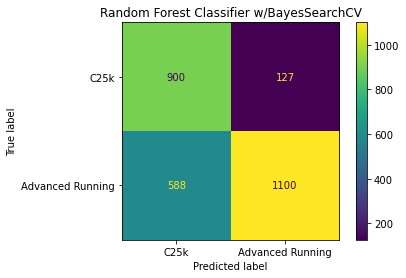

In [140]:
#random forest confusion matrix
plot_confusion_matrix(bs_rf, Z_test, y_test, display_labels=['C25k', 'Advanced Running'])
plt.title('Random Forest Classifier w/BayesSearchCV');

In [81]:
#Looking at feature importances 
bs_rf.best_estimator_.feature_importances_

array([6.83176301e-02, 3.78808441e-02, 2.95035259e-02, 1.47298743e-02,
       5.61349179e-02, 2.04029884e-02, 2.61533318e-02, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.05057896e-02,
       0.00000000e+00, 8.75183207e-03, 0.00000000e+00, 0.00000000e+00,
       9.26739820e-04, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 7.50685422e-04,
       0.00000000e+00, 0.00000000e+00, 2.31499274e-02, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 4.56016941e-05, 7.75937226e-03,
       6.68010229e-03, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       7.59293189e-03, 0.00000000e+00, 0.00000000e+00, 4.54818587e-03,
       1.80233695e-02, 1.94946127e-03, 0.00000000e+00, 0.00000000e+00,
       2.38633491e-02, 0.00000000e+00, 0.00000000e+00, 4.09649956e-04,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
      

---

#### Model 2: Balanced Random Forest Classifier with BayesSearchCV

In [11]:
#Instantiating balanced Random Forest
brf=BalancedRandomForestClassifier()

#rf params 
brf_params={
    'n_estimators': Integer(100,500),
    'max_features': ['sqrt', 'log2', None],
    'max_depth': Integer(1,100), 
    'min_samples_leaf': Real(0.1, 0.5)
}

#Instantiate BayesSearchCV
bs_brf=BayesSearchCV(
    estimator=rf,
    search_spaces=rf_params,
    n_iter=50, 
    verbose=1,
    cv=5,
    n_jobs=-1
)

In [19]:
import warnings
warnings.filterwarnings('ignore')

bs_brf.fit(Z_train, y_train.values.ravel())

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

BayesSearchCV(cv=5, estimator=RandomForestClassifier(class_weight='balanced'),
              n_jobs=-1,
              search_spaces={'max_depth': Integer(low=1, high=50, prior='uniform', transform='normalize'),
                             'max_features': ['sqrt', 'log2', None],
                             'min_samples_leaf': Real(low=0.1, high=0.5, prior='uniform', transform='normalize'),
                             'n_estimators': Integer(low=100, high=300, prior='uniform', transform='normalize')},
              verbose=1)

#### Model 2 Results: 

In [20]:
bs_brf.best_params_

OrderedDict([('max_depth', 15),
             ('max_features', 'sqrt'),
             ('min_samples_leaf', 0.1),
             ('n_estimators', 300)])

In [21]:
#predicted values 
brf_preds = bs_brf.predict(Z_test)

#best scores
print(f'The accuracy training score is    {bs_brf.score(Z_train, y_train)}')
print(f'The accuracy testing score is     {bs_brf.score(Z_test, y_test)}')
print(f'The bac score is                  {balanced_accuracy_score(y_test, brf_preds)}')
print(f'The precision is                  {precision_score(y_test, brf_preds)}')
print(f'The recall is                     {recall_score(y_test, brf_preds)}')

The accuracy training score is    0.7633784655061251
The accuracy testing score is     0.7506445672191528
The bac score is                  0.7748734407952118
The precision is                  0.8983451536643026
The recall is                     0.6753554502369669


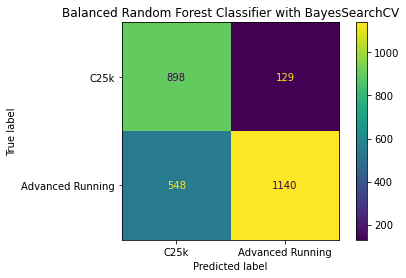

In [141]:
#balanced random forest confusion matrix
plot_confusion_matrix(bs_brf, Z_test, y_test, display_labels=['C25k', 'Advanced Running'])
plt.title("Balanced Random Forest Classifier with BayesSearchCV");

In [82]:
# #Looking at feature importances 
bs_brf.best_estimator_.feature_importances_

array([7.45538866e-02, 2.74530572e-02, 4.18385920e-02, 9.23610328e-03,
       5.91214523e-02, 7.01632868e-03, 1.09362312e-02, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.20325892e-03,
       0.00000000e+00, 9.52369422e-03, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 1.96106676e-02, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 6.83020568e-03,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       3.85410995e-03, 0.00000000e+00, 0.00000000e+00, 4.44506797e-03,
       2.40773276e-02, 2.11137521e-04, 0.00000000e+00, 0.00000000e+00,
       2.34849144e-02, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
      

---
#### Model 3: PCA and Logistic Regression with BayesSearchCV

In [64]:
# instantiating pca pipe with logisitic regression 

pipe=Pipeline([
    ('pca', PCA()), 
    ('logreg', LogisticRegression(class_weight='balanced'))
])

pipe_params = {
    'pca__n_components': [2,3,5],
    'logreg__C': np.logspace(-4, 4, 50),
}   

bs_pipe=BayesSearchCV(
    estimator=pipe,
    search_spaces=pipe_params,
    n_iter=50, 
    verbose=1,
    cv=5,
    n_jobs=-1
)

In [65]:
import warnings
warnings.filterwarnings('ignore')

bs_pipe.fit(Z_train, y_train.values.ravel())

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

BayesSearchCV(cv=5,
              estimator=Pipeline(steps=[('pca', PCA()),
                                        ('logreg',
                                         LogisticRegression(class_weight='balanced'))]),
              n_jobs=-1,
              search_spaces={'logreg__C': array([1.00000000e-04, 1.45634848e-04, 2.12095089e-04, 3.08884360e-04,
       4.49843267e-04, 6.55128557e-04, 9.54095476e-04, 1.38949549e-03,
       2.02358965e-03, 2.94705170e-03, 4.29193426e-03, 6.25055193e-03,
       9.10298178...
       3.72759372e+00, 5.42867544e+00, 7.90604321e+00, 1.15139540e+01,
       1.67683294e+01, 2.44205309e+01, 3.55648031e+01, 5.17947468e+01,
       7.54312006e+01, 1.09854114e+02, 1.59985872e+02, 2.32995181e+02,
       3.39322177e+02, 4.94171336e+02, 7.19685673e+02, 1.04811313e+03,
       1.52641797e+03, 2.22299648e+03, 3.23745754e+03, 4.71486636e+03,
       6.86648845e+03, 1.00000000e+04]),
                             'pca__n_components': [2, 3, 5]},
              verbose=1)

#### Model 3 Results:

In [66]:
bs_pipe.best_params_

OrderedDict([('logreg__C', 1.2067926406393288), ('pca__n_components', 5)])

In [67]:
#predicted values 
pipe_preds = bs_pipe.predict(Z_test)

#best scores
print(f'The accuracy training score is    {bs_pipe.score(Z_train, y_train)}')
print(f'The accuracy testing score is     {bs_pipe.score(Z_test, y_test)}')
print(f'The bac score is                  {balanced_accuracy_score(y_test, pipe_preds)}')
print(f'The precision is                  {precision_score(y_test, pipe_preds)}')
print(f'The recall is                     {recall_score(y_test, pipe_preds)}')

The accuracy training score is    0.8873537809708022
The accuracy testing score is     0.8939226519337017
The bac score is                  0.8927676086886298
The precision is                  0.9294478527607362
The recall is                     0.8975118483412322


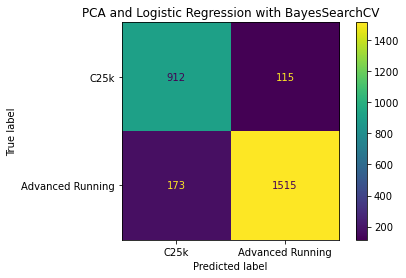

In [142]:
#pca/logreg confusion matrix
plot_confusion_matrix(bs_pipe, Z_test, y_test, display_labels=['C25k', 'Advanced Running'])
plt.title('PCA and Logistic Regression with BayesSearchCV');

In [86]:
#feature importances 
bs_pipe.best_estimator_.named_steps['logreg'].coef_

array([ 1.3371665 , -0.99267779,  0.15504327, -0.08795133,  1.40256813])

---

#### Model 4: Balanced Logistic Regression with BayesSearchCV

In [93]:
#modeling logreg by itself 
logreg = LogisticRegression(class_weight='balanced')


pipe_logreg_params = {
    'C': np.logspace(-4, 4, 50), 
    'max_iter': [500, 1000]
}   

bs_logreg=BayesSearchCV(
    estimator=logreg,
    search_spaces=pipe_logreg_params,
    n_iter=50, 
    verbose=1,
    cv=5,
    n_jobs=-1
)

In [94]:
bs_logreg.fit(Z_train, y_train.values.ravel())

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

BayesSearchCV(cv=5, estimator=LogisticRegression(class_weight='balanced'),
              n_jobs=-1,
              search_spaces={'C': array([1.00000000e-04, 1.45634848e-04, 2.12095089e-04, 3.08884360e-04,
       4.49843267e-04, 6.55128557e-04, 9.54095476e-04, 1.38949549e-03,
       2.02358965e-03, 2.94705170e-03, 4.29193426e-03, 6.25055193e-03,
       9.10298178e-03, 1.32571137e-02, 1.93069773e-02, 2.81176870e-02,
       4...
       3.72759372e+00, 5.42867544e+00, 7.90604321e+00, 1.15139540e+01,
       1.67683294e+01, 2.44205309e+01, 3.55648031e+01, 5.17947468e+01,
       7.54312006e+01, 1.09854114e+02, 1.59985872e+02, 2.32995181e+02,
       3.39322177e+02, 4.94171336e+02, 7.19685673e+02, 1.04811313e+03,
       1.52641797e+03, 2.22299648e+03, 3.23745754e+03, 4.71486636e+03,
       6.86648845e+03, 1.00000000e+04]),
                             'max_iter': [500, 1000]},
              verbose=1)

#### Model 3 Results:

In [95]:
bs_logreg.best_params_

OrderedDict([('C', 2222.996482526191), ('max_iter', 1000)])

In [96]:
#predicted values 
logreg_preds = bs_logreg.predict(Z_test)

#best scores
print(f'The accuracy training score is    {bs_logreg.score(Z_train, y_train)}')
print(f'The accuracy testing score is     {bs_logreg.score(Z_test, y_test)}')
print(f'The bac score is                  {balanced_accuracy_score(y_test, logreg_preds)}')
print(f'The precision is                  {precision_score(y_test, logreg_preds)}')
print(f'The recall is                     {recall_score(y_test, logreg_preds)}')

The accuracy training score is    0.9241963710048816
The accuracy testing score is     0.9244935543278084
The bac score is                  0.9209751980876524
The precision is                  0.9426865671641791
The recall is                     0.9354265402843602


In [131]:
#feature importances 
bs_logreg.best_estimator_.coef_

array([[ 6.91968391e+00, -4.62394834e+00,  1.36310087e+00,
         1.86356962e+00,  2.49887919e+00,  5.01824648e-02,
         1.21810198e-01,  7.32135716e-02,  1.07097631e-01,
         1.89518657e-01,  2.46855343e-01,  5.60502509e-02,
         5.03086857e-02,  8.95952740e-02,  3.45637197e-01,
         2.22885131e-01, -4.78141286e-01, -8.62311735e-02,
        -5.96769768e-02, -1.00885039e-01,  1.32270632e-02,
         2.45137459e-01,  1.50748386e-01, -6.66569638e-02,
         6.43040289e-02, -4.25506514e+00,  2.66992184e-02,
         2.67925726e-02, -7.36870387e-01,  2.31499784e-02,
        -3.03987339e-01, -1.95205411e-01, -1.38002302e-01,
        -1.36362569e-01, -7.77464966e-02,  1.45450109e-01,
        -1.20625270e-01,  8.37070348e-02, -1.25270549e-01,
        -8.72898273e-03, -6.76387662e-02, -7.85526101e-02,
        -1.38089988e-01, -5.08992953e-01,  6.12725488e-02,
        -6.29577592e-02, -2.70551827e-02,  2.56337716e-02,
         7.56699383e-02, -2.88801872e-01, -4.03844717e-0

In [132]:
#feature importances into dataframe 
coef_df=pd.DataFrame(bs_logreg.best_estimator_.coef_.T, columns=['coef'])
coef_df['features']=X_train.columns
coef_df['odds_ratio']=np.exp(coef_df['coef'])
coef_df.head()

,coef,features,odds_ratio
0,6.919684,post_length,1012.000058
1,-4.623948,post_word_count,0.009814
2,1.363101,neg,3.908294
3,1.863570,pos,6.446708
4,2.498879,neu,12.168847


In [123]:
#save coef_df to csv
coef_df.to_csv('logreg_coef_df.csv', index=False)

In [129]:
#looking at top 20 predictive of r/AdvancedRunning
top20_advanced=coef_df.sort_values(by='coef', ascending=False).head(15)
top20_advanced

,coef,features,odds_ratio
0,6.919684,post_length,1012.000058
4,2.498879,neu,12.168847
3,1.863570,pos,6.446708
2,1.363101,neg,3.908294
68,1.306825,marathon,3.694427
88,1.045745,race,2.845518
84,0.740333,pr,2.096633
109,0.689255,training,1.992230
71,0.500644,mileage,1.649784
70,0.385168,mile,1.469861


In [127]:
#Looking at top 20 predictive of r/c25k
top20_c25k=coef_df.sort_values(by='coef').head(20)
top20_c25k

,coef,features,odds_ratio
1,-4.623948,post_word_count,0.009814
25,-4.255065,c25k,0.014192
28,-0.736870,complete,0.478609
73,-0.600307,minute,0.548643
43,-0.508993,finish,0.601101
16,-0.478141,5k,0.619935
86,-0.456730,program,0.633352
98,-0.450206,start,0.637497
113,-0.387977,walk,0.678428
106,-0.362077,today,0.696228


#### Model Results (All grid searched using BayesSearchCV):
**Model**|**Training Accuracy**|**Testing Accuracy**|**Balanced Testing Accuracy**|**Precision**|
--|--|--|--|--|
Random Forest|0.7462|0.7366|0.7639|0.8964|
Balanced Random Forest|0.7634|0.7506|0.7749|0.8983|
PCA, Logistic Regression|0.8873|0.8939|0.8928|0.9294|
Balanced Logistic Regression|0.9241|0.9244|0.9209|0.9427|



All models performed better than the null model. Out of all four models ran, the Balanced Logistic Regression model performed the best. No models showed signs of being significantly overfit, but bias was decreased with each new model. This ultimately led to an optimal bias/variance trade-off in the final Logistic Regression model. When balanced, the best Logistic Regression model accounts for 92.09% variance in classifying the target variable (r/AdvancdRunning). 

For this particular problem, it is more important to optimize for precision (minimize false positives). Our goal is to re-target Advanced Runners. We want to minimize falsely predicting r/AdvancedRunning when we are actually predicting r/C25K. This will lead to producing retargeting marketing materials that are not effective for the Advanced Running segmentation.

---
## Conclusions and Recommendations:

The best model at predicting r/AdvancedRunning was the Balanced Logistic Regression Model. This model accounted for 92.09% variance in classifying the target variable. 

Some words that were predictive of r/AdvancedRunning were: 
- Posts containing "marathon" had a 3.69 increase in odds of being in r/AdvancedRunning. 
- Posts containing "pr" had a 2.09 increase in odds of being in r/AdvancedRunning. 
- Posts containing "mileage" had a 1.64 increase in odds of being in r/AdvanceRunning. 
- Posts containing "long run" had a 1.44 increase in odds of being in r/AdvancedRunning. 
- Posts containing "injury" had a 1.24 increase in odds of being in r/AdvancedRunning. 
- r/AdvancedRunning showed having higher odds of having positive, neutral and negative sentiment than r/C25K did. This explains more variation in sentiment across all posts. 

- Posts containing "c25k" had a 98% (1-0.14192) reduction in odds of being in r/AdvancedRunning.
- Posts containing "5K" had a 38% reduction in odds of being in r/AdvancedRunning. 
- Posts containing "Program" had a 36.67% reduction in odds of being in r/AdvancedRunning.
- Posts containing "start" had a 36.25% reduction in odds of being in r/AdvancedRunning.
- Posts containing "walk" had a 32.15% reduction in odds of being in r/AdvancedRunning. 
- Posts containing "stop" had a 21.84% reduction in odds of being in r/AdvancedRunning. 

Not surprisingly, seemingly more competitive words are predictive of being in r/AdvancedRunning. Words predictive of being in r/C25k are more linked to beginning programs, shorter runs and walking. As a result, I recommend that re-targeting content for advanced runners should be aimed around tips for longer runs, how to get a pr in your next race, and how to prevent and deal with injury.  

I will continue to improve this project. I want to look more deeply into sentiment analysis after modeling, add a boosting model and clean up my vectorizing sections.

---